<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Canalización de datos de  imágenes</center></span>

<center>tf.keras.preprocessing.image.ImageDataGenerator</center>

##   <span style="color:blue">Profesores</span>

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 
3. Campo Elías Pardo Turriago, cepardot@unal.edu.co 

##   <span style="color:blue">Asesora Medios y Marketing digital</span>
 

4. Maria del Pilar Montenegro, pmontenegro88@gmail.com 

## <span style="color:blue">Asistentes</span>

5. Oleg Jarma, ojarmam@unal.edu.co 
6. Laura Lizarazo, ljlizarazore@unal.edu.co 

## <span style="color:blue">Contenido</span> 

* [Introducción](#Introducción)
* [Librerías](#Librerías)
* [Pre-procesamiento](#Pre-procesamiento)
* [Define y compila el modelo](#Define-y-compila-el-modelo)

## <span style="color:blue">Introducción</span> 

Adpatado de [Tensorflow 2.X](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

En es cuaderno vamos a estudiar la parte de la API tf.data para el entubamiento de conjuntos de imágenes.  Usaresmoe el conjunto de datos *rice_leaf_diseases* que contien imágenes de hojas enfermas. Hay 3 clases (distintas enfermedades) y se trata de un problema de clasificación.

La función *tf.keras.preprocessing.image.ImageDataGenerator* genere tensores con lotes de datos de imágenes con aumentado de datos en tiempo real. La función tiene la siguiente estructura de entrada (signatura). Por favor revise la documentación oficial para entender cada parámetro.

In [ ]:
tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False, samplewise_center=False,
    featurewise_std_normalization=False, samplewise_std_normalization=False,
    zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0,
    height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0,
    channel_shift_range=0.0, fill_mode='nearest', cval=0.0,
    horizontal_flip=False, vertical_flip=False, rescale=None,
    preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None
)

En particular observe el parámetro *validation_split* que permite separar los datos entre entrenamiento y validación.

## <span style="color:blue">Librerías</span> 

In [23]:
import tensorflow as tf

from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import InputLayer

from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Lectura de datos desde la fuente

In [ ]:
# 
#dataset_path = keras.utils.get_file(origin="https://archive.ics.uci.edu/ml/machine-learning-databases/00486/rice_leaf_diseases.zip",
#                                    cache_dir="/content",
#                                    cache_subdir='Datasets/rice_leaf_diseases',
#                                    extract=True)

### Lectura desde carpetas locales                         

Par este ejemplo, en la carpeta local '/home/alvaro/.keras/datasets/rice_leaf_diseases' hay tres carpetas, una por cada enfermedad:

- Bacterial leaf blight
- Brown spot
- Leaf smut

La carpeta raíz debe cambiar de acuerdo a su sistema local. Todos los archivos son de tipo *jpg*.

In [4]:
dataset_path = '/home/alvaro/.keras/datasets/rice_leaf_diseases'

## <span style="color:blue">Pre-procesamiento</span> 

### Crea el objeto generador de imágenes

In [30]:
# crea el objeto de tipo ImageDataGenerator
image_gen = ImageDataGenerator(
    rescale=1./255,
    #featurewise_center=True,
    #featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

# Ajusta el objeto para estas imágenes


### Crea flujo de datos desde un directorio

In [31]:
# crea un iterador sobre los directorios de datos para entrenamiento
train_image_iterator = image_gen.flow_from_directory(dataset_path,
                                  target_size=(256, 256),
                                  batch_size=12,
                                  shuffle=True,
                                  subset='training')

# crea un iterador sobre los directorios de datos para validación
test_image_iterator = image_gen.flow_from_directory(dataset_path,
                                  target_size=(256, 256),
                                  batch_size=8,
                                  shuffle=True,
                                  subset='validation')

Found 96 images belonging to 3 classes.
Found 24 images belonging to 3 classes.


### Extrae el primer batch del iterador

In [32]:
images, labels = next(train_image_iterator)

In [14]:
images.shape

(12, 256, 256, 3)

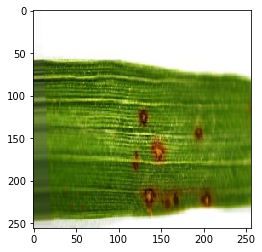

In [15]:
# muestra una imagen de este batch
plt.figure(figsize=(4,4))
plt.imshow(images[0], interpolation='none')
plt.show()

In [20]:
print(images.dtype, images.shape)
print(labels.dtype, labels.shape)

float32 (12, 256, 256, 3)
float32 (12, 3)


## Pinta las imágenes de este batch con sus etiquetas

/home/alvaro/anaconda3/envs/huggingface/lib/python3.8/site-packages/matplotlib/text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


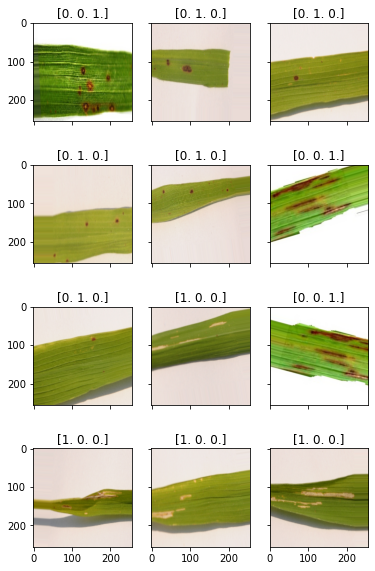

In [17]:
fig, axs = plt.subplots(4, 3,figsize=(6,10))
k = 0
for i in range(4):
    for j in range(3):
        axs[i, j].imshow(images[k],'binary')
        axs[i, j].set_title(labels[k])
        k += 1
 
#for ax in axs.flat:
#    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


## <span style="color:blue">Define y compila el modelo</span> 

### Modelo

In [19]:
# define model
class NeuralNetwork(Model):
    def __init__(self):
        super(NeuralNetwork, self).__init__()

        self.linear_relu_stack = Sequential([
            InputLayer(input_shape=(256,256,3)), # tamaño de entrada
            Flatten(),
            Dense(512, activation='relu'),
            Dense(512, activation='relu'),
            Dense(3, activation='softmax'),    # tamaño de salida        
        ])
                  
    # la función call es la que define la estructura de la red
    # en este ejemplo aceptamos solo una entrada, pero si lo desea,
    # siéntete libre de usar más
    def call(self, x):
        probs = self.linear_relu_stack(x)
        return probs

model = NeuralNetwork()

## Compila el modelo

In [34]:
epochs = 20

optimizer = Adam()

model.compile(loss="categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

### Ajusta el modelo

In [35]:
hist =  model.fit(train_image_iterator,
                  validation_data = test_image_iterator,
                  epochs=epochs, verbose=1,steps_per_epoch =8)

Epoch 1/20
8/8 [==============================] - 14s 2s/step - loss: 44.0792 - accuracy: 0.2812 - val_loss: 21.2095 - val_accuracy: 0.3333
Epoch 2/20
8/8 [==============================] - 15s 2s/step - loss: 12.1713 - accuracy: 0.3438 - val_loss: 6.2776 - val_accuracy: 0.4167
Epoch 3/20
8/8 [==============================] - 16s 2s/step - loss: 8.2723 - accuracy: 0.3646 - val_loss: 6.0242 - val_accuracy: 0.3333
Epoch 4/20
8/8 [==============================] - 15s 2s/step - loss: 3.0996 - accuracy: 0.3854 - val_loss: 1.6050 - val_accuracy: 0.4167
Epoch 5/20
8/8 [==============================] - 17s 2s/step - loss: 2.8583 - accuracy: 0.3750 - val_loss: 4.2074 - val_accuracy: 0.3333
Epoch 6/20
8/8 [==============================] - 14s 2s/step - loss: 2.3854 - accuracy: 0.3333 - val_loss: 3.7551 - val_accuracy: 0.3333
Epoch 7/20
8/8 [==============================] - 14s 2s/step - loss: 2.9847 - accuracy: 0.3542 - val_loss: 4.3200 - val_accuracy: 0.4167
Epoch 8/20
8/8 [===============